<a href="https://colab.research.google.com/github/marco-finger/DSF-FS22-MarcoFinger/blob/main/Semesterproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"Calculations were performed on UBELIX (http://www.id.unibe.ch/hpc), the HPC cluster at the University of Bern."

'Calculations were performed on UBELIX (http://www.id.unibe.ch/hpc), the HPC cluster at the University of Bern.'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Potential Plot

In [34]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/DSF-FS22/project/potential_data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
df = pd.read_csv(path, delimiter = ";", header=0) 

df.head()


,Steps,Potential
0,0,-445319.7500
1,1,-533484.5000
2,2,-602262.1250
3,3,-656588.3125
4,4,-702226.5000


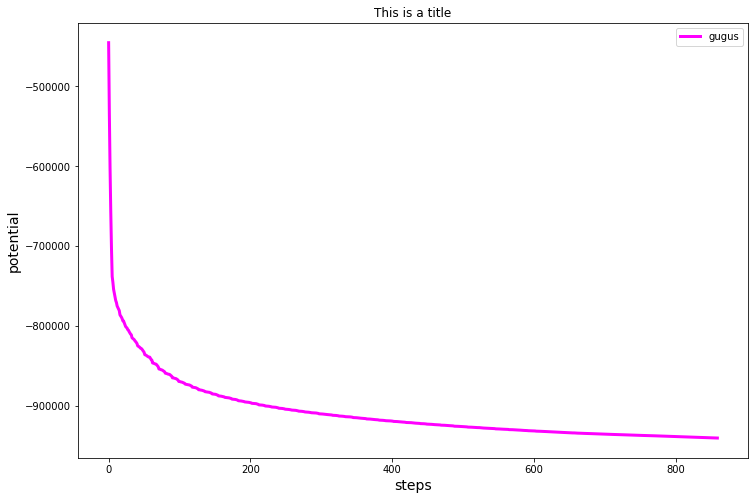

In [45]:
x = df.iloc[:,0]
y = df.iloc[:,1]

plt.figure(figsize = (12,8))
plt.plot(x,y, color = "magenta", label = 'gugus', lw = 3)


plt.xlabel('steps', size = 14) # x-label
plt.ylabel('potential', size = 14) # y-label
plt.legend()
plt.title('This is a title')
plt.savefig('/content/drive/MyDrive/DSF-FS22/project/potential_plot.png')

# Temperature Plot

In [48]:
from google.colab import drive
drive.mount('/content/drive')
path1 = '/content/drive/MyDrive/DSF-FS22/project/temperature_data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
df1 = pd.read_csv(path1, delimiter = ";", header=0) 

df1.head()

,time,temperature
0,0,300.663879
1,1,299.450043
2,2,302.028015
3,3,301.722626
4,4,297.637512


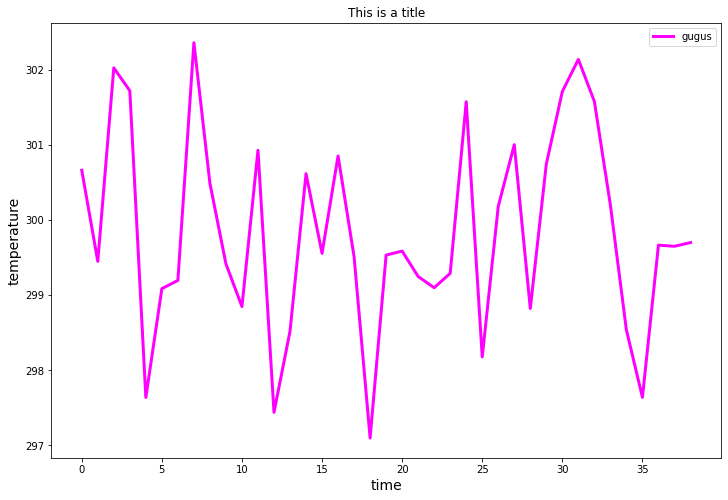

In [51]:
x = df1.iloc[:,0]
y = df1.iloc[:,1]

plt.figure(figsize = (12,8))
plt.plot(x,y, color = "magenta", label = 'gugus', lw = 3)


plt.xlabel('time', size = 14) # x-label
plt.ylabel('temperature', size = 14) # y-label
plt.legend()
plt.title('This is a title')
plt.savefig('/content/drive/MyDrive/DSF-FS22/project/temperature_plot.png')